In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistan-crime-data-2012-2017/pakistna-crime-data.csv


# About Dataset
## Context
## This dataset contains the data of no. of crimes reported in in every province of Pakistan by crime.

## Content
## Geography: Pakistan
## Time Period: 01/01/2011 - 31/12/2017
### Dataset: The dataset contains number of crimes report in each province of Pakistan by nature of crime like Dacoity, Robber, Murder, Car Theft etc.

### Variables: The dataset contains Year, Offence, Punjab, Sindh, KP, Balochistan, GB, Islamabad, AJK, Railways and Pakistan
#### File Type: CSV

#### Acknowledgements
## The data is collected from Pakistan Bureau of Statistics.

## First we need to import dataset and the library so that we can analyze the data and work on it.

In [2]:
# Import important libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import datasat
df=pd.read_csv(r'../input/pakistan-crime-data-2012-2017/pakistna-crime-data.csv')

In [4]:
# Top rows visualization
df.head()


,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
0,2012,Murder,6128,3726,2958,711,120,6,102,95,13846
1,2012,Attempt to Murder,7641,3732,2892,583,146,9,163,172,15338
2,2012,Kidnapping /Abduction,15699,3077,1052,386,70,6,32,288,20610
3,2012,Dacoity,2715,1341,60,98,22,1,8,12,4257
4,2012,Robbery,12181,4320,134,160,177,5,26,78,17081


In [5]:
# Ending rows visualization
df.tail()

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
55,2017,Burglary,11023,1344,798,135,253,1,63,216,13833
56,2017,Cattle Theft,4721,383,126,39,22,0,17,34,5342
57,2017,Other Theft,33053,2221,882,272,506,234,64,72,37304
58,2017,Others,325149,57409,172504,7917,5798,1270,1370,6194,577611
59,2017,TOTAL RECORDED CRIME,405845,70273,180830,9492,7136,1528,1736,7085,683925


In [6]:
# Count of Rows and Columns
print(df.shape)
rows,columns = df.shape
print("Total rows: ",rows)
print("Total Coloumns: ",columns)

(60, 11)
Total rows:  60
Total Coloumns:  11


In [7]:
# Columns Name
df.columns

Index(['Year', 'Offence', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'Islamabad',
       'Railways', 'G.B', 'AJK', 'Pakistan'],
      dtype='object')

In [8]:
# Information of dataset(columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         60 non-null     int64 
 1   Offence      60 non-null     object
 2   Punjab       60 non-null     int64 
 3   Sindh        60 non-null     int64 
 4   KP           60 non-null     int64 
 5   Balochistan  60 non-null     int64 
 6   Islamabad    60 non-null     int64 
 7   Railways     60 non-null     int64 
 8   G.B          60 non-null     int64 
 9   AJK          60 non-null     int64 
 10  Pakistan     60 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 5.3+ KB


#### Finding missing values.

In [9]:
df.isnull().sum()

Year           0
Offence        0
Punjab         0
Sindh          0
KP             0
Balochistan    0
Islamabad      0
Railways       0
G.B            0
AJK            0
Pakistan       0
dtype: int64

#### There is no missing value.

#### Finding Duplicate Values

In [10]:
df.duplicated().sum()

0

#### There is no duplicated value in dtatset

In [11]:
# Statical Discription
df.describe()

,Year,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2014.500000,79055.900000,14763.366667,31113.833333,1758.166667,1517.733333,347.833333,308.466667,1199.900000,130065.200000
std,1.722237,138782.467265,25794.011521,60948.397625,3099.910568,2709.241741,634.181661,534.831305,2199.744991,234047.594987
min,2012.000000,602.000000,383.000000,45.000000,30.000000,12.000000,0.000000,2.000000,0.000000,1280.000000
25%,2013.000000,5924.000000,1403.500000,204.250000,151.250000,91.500000,1.000000,22.750000,51.500000,9495.750000
50%,2014.500000,12395.000000,2662.500000,1115.000000,263.000000,181.000000,4.500000,60.500000,153.000000,16394.500000
75%,2016.000000,30760.000000,3762.500000,3150.250000,591.000000,529.000000,280.750000,101.250000,279.000000,35792.000000
max,2017.000000,408148.000000,78688.000000,180830.000000,9492.000000,8396.000000,2115.000000,1736.000000,7085.000000,683925.000000


### Visualization of 2017 crime rate in Pakistan.

In [12]:
df1 = df.iloc[50:59]
df1

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
50,2017,Murder,3914,1409,2361,325,84,6,61,75,8235
51,2017,Attempt to Murder,4440,1644,2641,333,163,5,94,179,9499
52,2017,Kidnapping /Abduction,13558,2927,1197,248,99,7,48,279,18363
53,2017,Dacoity,602,572,45,38,16,1,4,2,1280
54,2017,Robbery,9385,2364,276,185,195,4,15,34,12458
55,2017,Burglary,11023,1344,798,135,253,1,63,216,13833
56,2017,Cattle Theft,4721,383,126,39,22,0,17,34,5342
57,2017,Other Theft,33053,2221,882,272,506,234,64,72,37304
58,2017,Others,325149,57409,172504,7917,5798,1270,1370,6194,577611


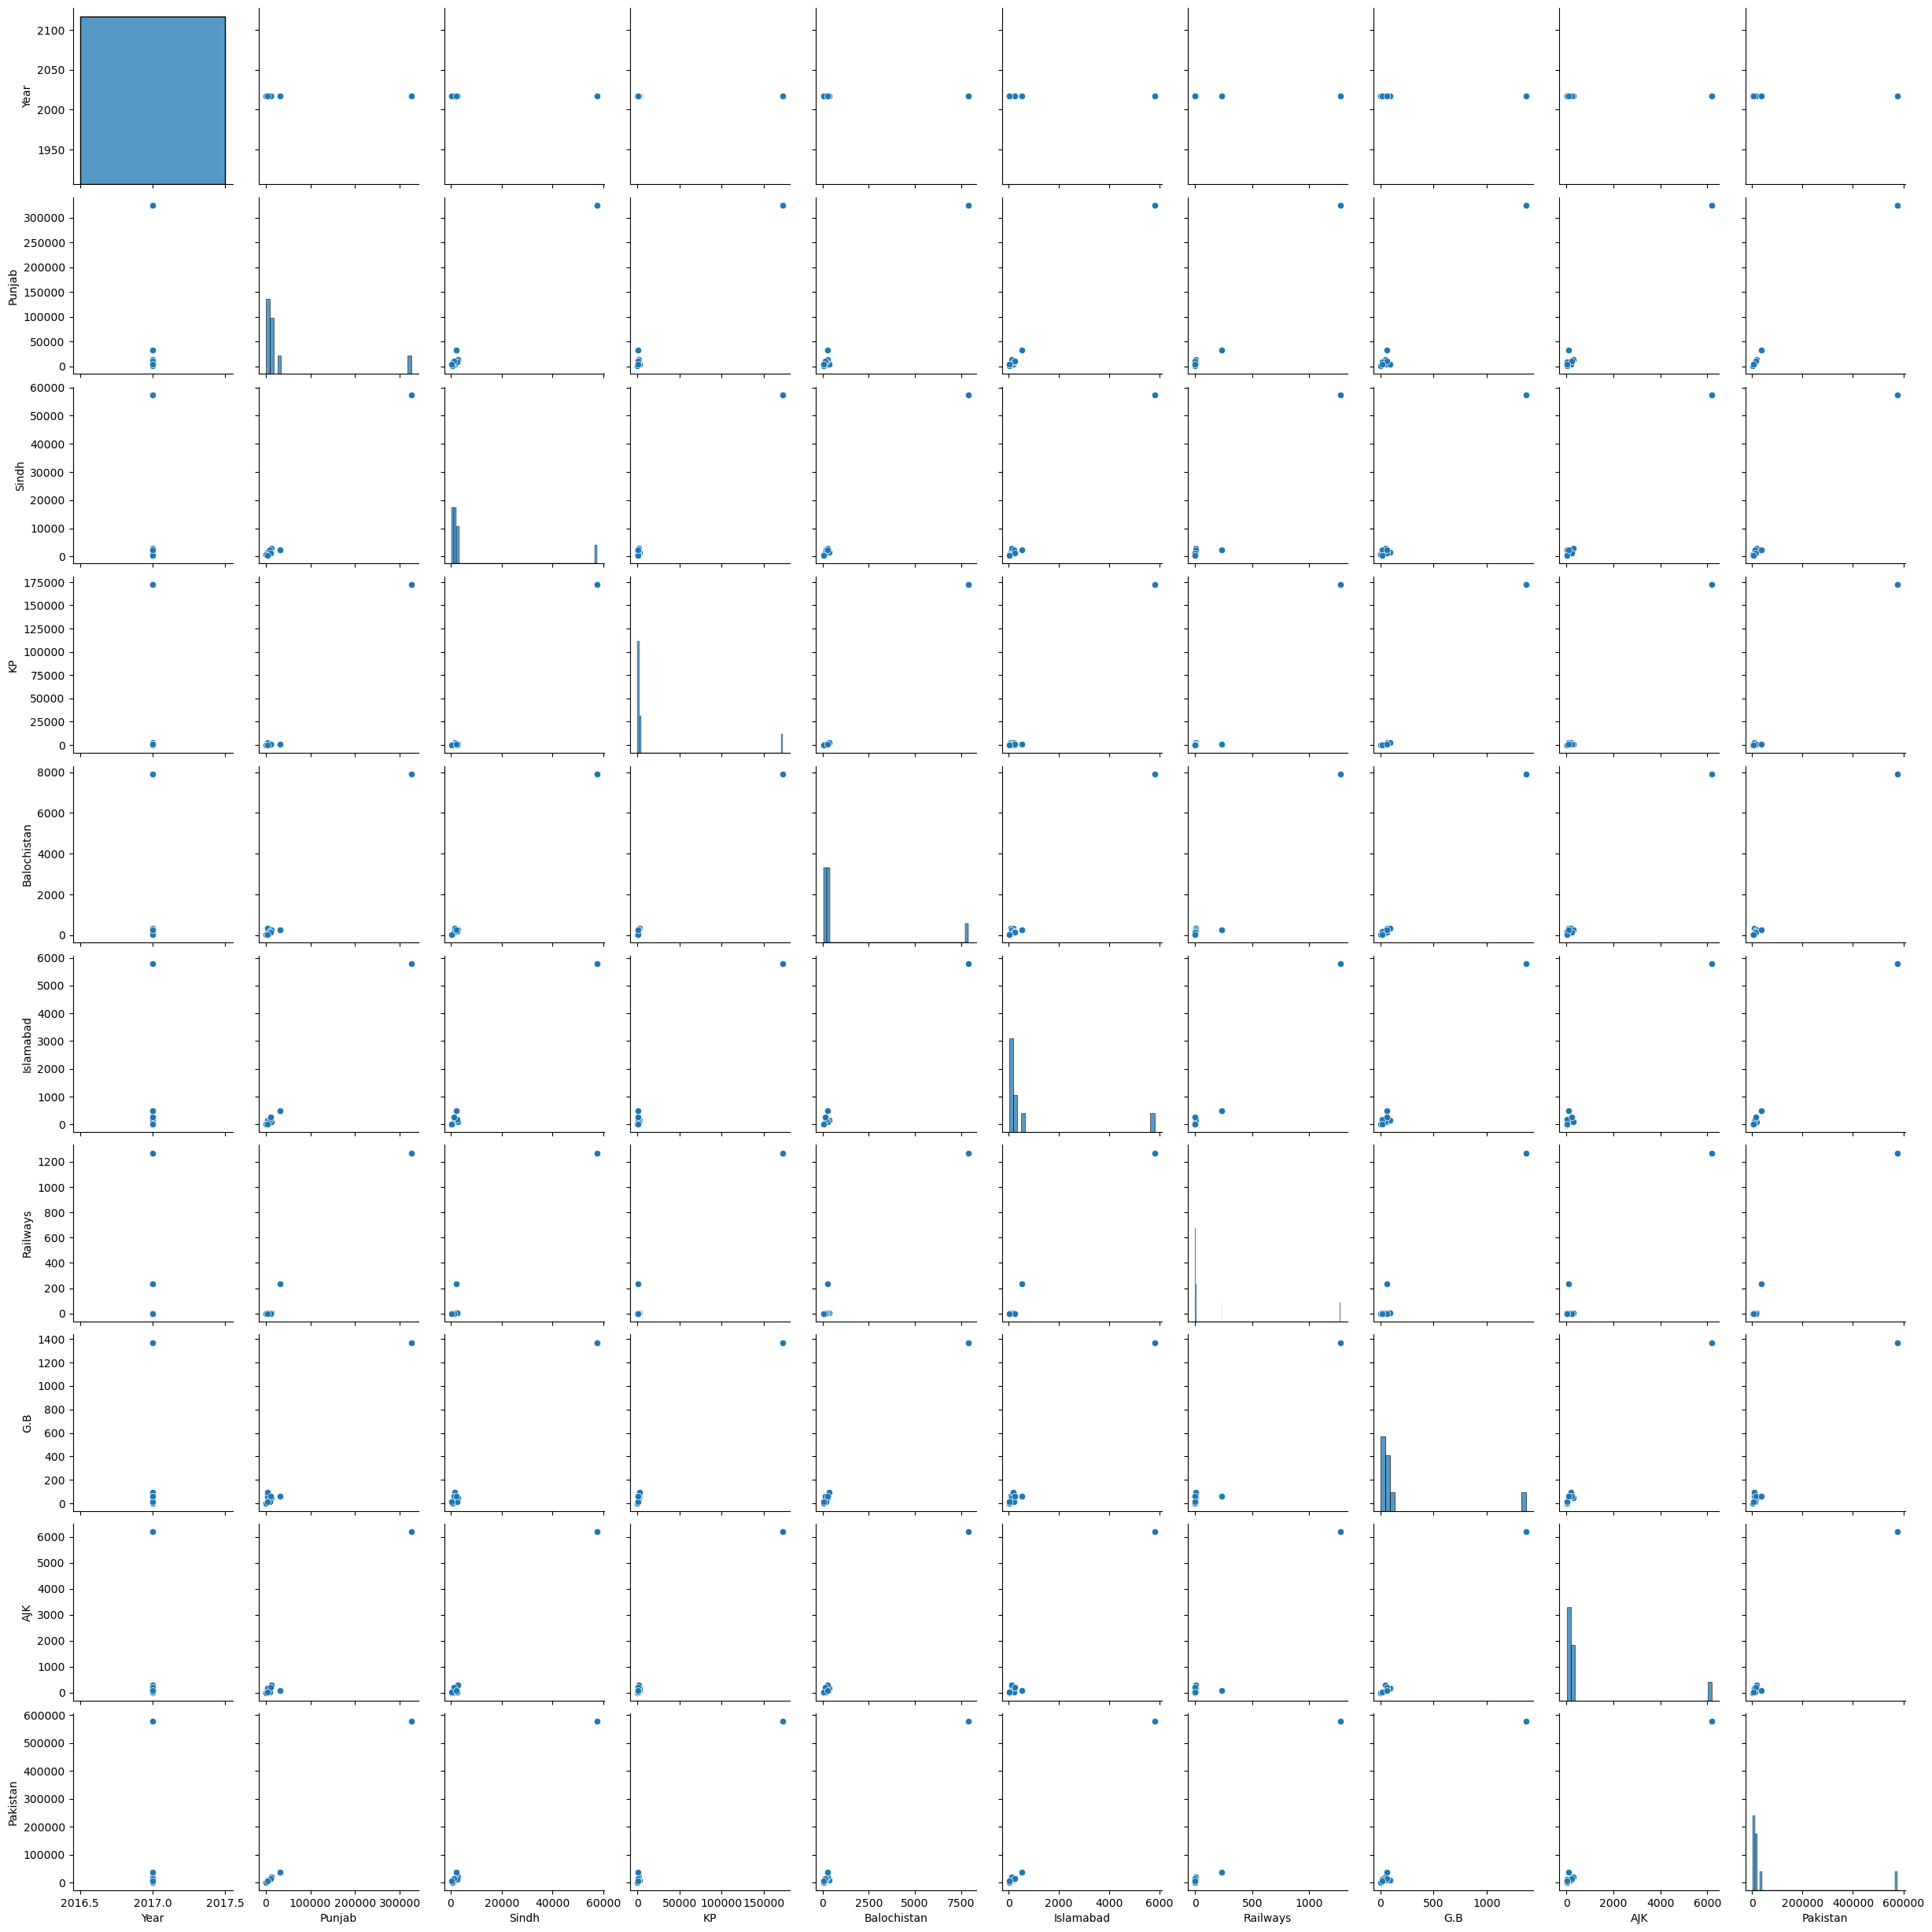

In [13]:
df1 = sns.pairplot(data=df1)

# Creating Heatmap

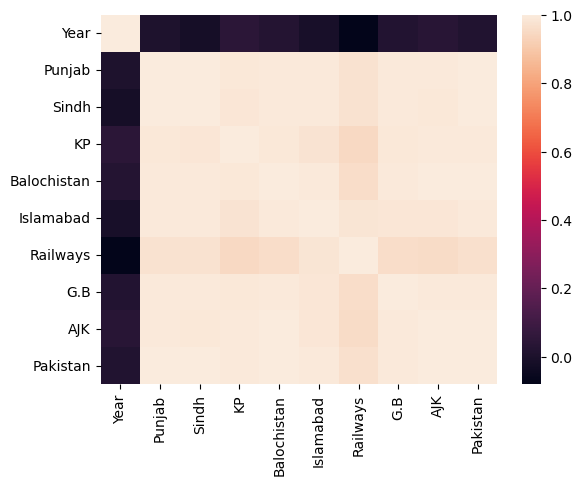

In [14]:
corelation = df.corr()


sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels = corelation.columns  )
plt.show()

## Visualization of 2017 crime rate in Punjab where crime rate is high other then other than diffrent states of Pakistan.

In [15]:
df1 = df.iloc[50:53]
df1

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
50,2017,Murder,3914,1409,2361,325,84,6,61,75,8235
51,2017,Attempt to Murder,4440,1644,2641,333,163,5,94,179,9499
52,2017,Kidnapping /Abduction,13558,2927,1197,248,99,7,48,279,18363


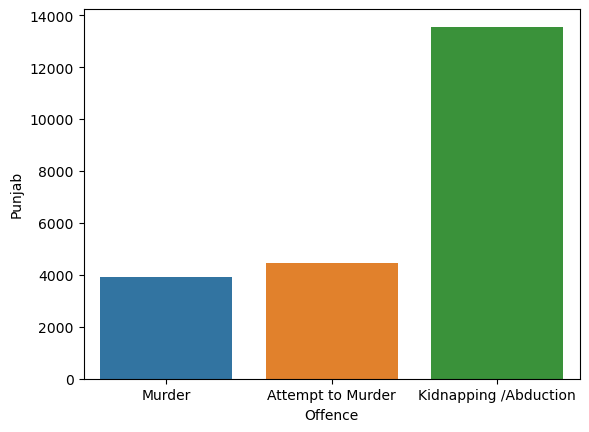

In [16]:
df1 = sns.barplot(df1, x='Offence',y='Punjab')

In [17]:
df2 = df.iloc[53:59]
df2

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
53,2017,Dacoity,602,572,45,38,16,1,4,2,1280
54,2017,Robbery,9385,2364,276,185,195,4,15,34,12458
55,2017,Burglary,11023,1344,798,135,253,1,63,216,13833
56,2017,Cattle Theft,4721,383,126,39,22,0,17,34,5342
57,2017,Other Theft,33053,2221,882,272,506,234,64,72,37304
58,2017,Others,325149,57409,172504,7917,5798,1270,1370,6194,577611


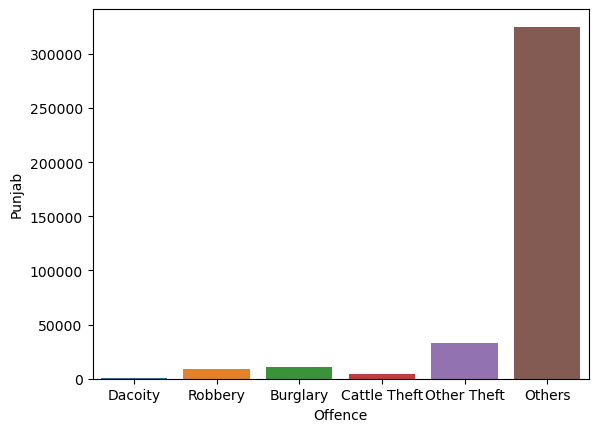

In [18]:
df2 = sns.barplot(df2, x='Offence',y='Punjab')